# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## Preprocessing Of Project Subject Categories

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing Of Project Subject Subcategories:

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Pre-Processing:

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

## Train And Test Data Split :

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'],test_size=0.33) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.33) 


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 18) (49041,)
(24155, 18) (24155,)
(36052, 18) (36052,)


In [10]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_train.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      137700  p236261  3617047a8a28805b24209e149fb95d58           Mrs.   
1      101423  p074251  aa4e89795dc735d6836c2ab135d8d9a9           Mrs.   
2      117181  p063584  bf30aec438a6bfade9f577406ffe4f80           Mrs.   
3      125253  p110351  e0726a10df81e367ebeface0fb19491a           Mrs.   
4       46931  p133095  dbb580af43c5d2b552f0dda8deb89880           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IL        2016-09-08 23:45:32          Grades PreK-2   
1           MI        2016-09-23 07:13:37             Grades 3-5   
2           AL        2016-08-04 10:57:21             Grades 6-8   
3           UT        2017-01-12 15:24:27          Grades PreK-2   
4           CA        2016-09-05 20:29:57             Grades 3-5   

                              project_title  \
0        Our Target: A Healthy and Fit Body   
1                      Fun Supplies Needed!   
2                     Adding to Our Library   
3             Sticks of Paint? Yes, Please!   
4  Dash Brings Coding Alive for 5th Graders   

                                     project_essay_1  \
0  Each day, my students come in with challenges ...   
1  My students are special because they are nurtu...   
2  Our school is located in a small, rural town i...   
3  My K, 1st, 2nd, and 4th grade students are pas...   
4  A snapshot in my classroom includes using the ...   

                                     project_essay_2 project_essay_3  \
0  My students love when we do yoga-inspired move...             NaN   
1  My students need lined paper to complete pre-t...             NaN   
2  Your donations will greatly impact the student...             NaN   
3  Because we work in the classroom with limited ...             NaN   
4  Dash is a robot that can be programmed using b...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need tablets, books, wobble cushio...   
1             NaN  My students need supplies to complete their EL...   
2             NaN  My students need nonfiction books to add to ou...   
3             NaN  My students need paint that we can use in the ...   
4             NaN  My students need the dash robot to learn about...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             3                    1   
1                                             2                    1   
2                                             3                    1   
3                                             0                    1   
4                                             6                    1   

                 clean_categories                     clean_subcategories  \
0                   Health_Sports                         Health_Wellness   
1  Literacy_Language Math_Science          Literature_Writing Mathematics   
2     Math_Science History_Civics  EnvironmentalScience History_Geography   
3      AppliedLearning Music_Arts           CharacterEducation VisualArts   
4                    Math_Science             AppliedSciences Mathematics   

                                               essay   price  quantity  
0  Each day, my students come in with challenges ...  312.72        17  
1  My students are special because they are nurtu...   57.70        29  
2  Our school is located in a small, rural town i...  310.54        20  
3  My K, 1st, 2nd, and 4th grade students are pas...  179.98         2  
4  A snapshot in my classroom includes using the ...  135.92         1

In [11]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [12]:
# printing some random reviews
print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[150])
print("="*50)
print(X_train['essay'].values[1000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)

Each day, my students come in with challenges that are very stressful. They live in a poverty stricken area with many social ills, such as homelessness, hunger, mental illness, and violence. These are the same children who rely on government assistance for the necessities of life, from food to utilities to housing.  The urban, neighborhood school that services my students is a Title I school that has over 98% of students receiving free lunch.\r\n\r\nThe first graders in my class strive to make the best of any situation. They come to school each day with hope for a better tomorrow. They are remarkable children with awesome resiliency! They withstand many trials and negative situations in life, but they bounce back better than ever! The smiles on their faces, unwavering curiosity, and determination in their spirits make them a joy to teach!My students love when we do yoga-inspired moves. They always seem to want more! They love the challenge of getting into the correct position and the e

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

These students are a real-life example of a broken system that has failed to equip city schools with proper materials and resources. This year, that will change! Our school is 99.2% low income with 100% qualifying for free and reduced price lunch. Moreover, as of this year our school district is being affected by unfortunate budget cuts. Last year we had 58% of students grades 3-8 on track for achieving success in high school and I take full ownership of this! It is time for a change and time that these students be equipped for success. It is time to expose these students to the needed skills that are mandatory today and tomorrow in this competitive job market. Join me in supporting these children with the resources to not only support their ability to think and learn differently, but to ultimately change these statistics! We are hoping to provide an opportunity and purpose, through quality instruction with these chrome books to get them college and career ready.The world is changing! 

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

These students are a real-life example of a broken system that has failed to equip city schools with proper materials and resources. This year, that will change! Our school is 99.2% low income with 100% qualifying for free and reduced price lunch. Moreover, as of this year our school district is being affected by unfortunate budget cuts. Last year we had 58% of students grades 3-8 on track for achieving success in high school and I take full ownership of this! It is time for a change and time that these students be equipped for success. It is time to expose these students to the needed skills that are mandatory today and tomorrow in this competitive job market. Join me in supporting these children with the resources to not only support their ability to think and learn differently, but to ultimately change these statistics! We are hoping to provide an opportunity and purpose, through quality instruction with these chrome books to get them college and career ready.The world is changing! 

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

These students are a real life example of a broken system that has failed to equip city schools with proper materials and resources This year that will change Our school is 99 2 low income with 100 qualifying for free and reduced price lunch Moreover as of this year our school district is being affected by unfortunate budget cuts Last year we had 58 of students grades 3 8 on track for achieving success in high school and I take full ownership of this It is time for a change and time that these students be equipped for success It is time to expose these students to the needed skills that are mandatory today and tomorrow in this competitive job market Join me in supporting these children with the resources to not only support their ability to think and learn differently but to ultimately change these statistics We are hoping to provide an opportunity and purpose through quality instruction with these chrome books to get them college and career ready The world is changing Technology is ta

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:24<00:00, 2012.61it/s]


In [19]:
# after preprocesing
preprocessed_essays_train[20000]

'students real life example broken system failed equip city schools proper materials resources year change school 99 2 low income 100 qualifying free reduced price lunch moreover year school district affected unfortunate budget cuts last year 58 students grades 3 8 track achieving success high school take full ownership time change time students equipped success time expose students needed skills mandatory today tomorrow competitive job market join supporting children resources not support ability think learn differently ultimately change statistics hoping provide opportunity purpose quality instruction chrome books get college career ready world changing technology taking yet school still not resources needed students exposed necessary skills century future project allow students exposed many necessary skills new thinking knowledge world never knew existed also allow practice many basic instructional skills engaging manner math able practice math skills standards sing fun games applic

In [20]:
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:17<00:00, 2117.13it/s]


In [21]:
preprocessed_essays_test[10000]

'first classroom carpet flooring not know donorschoose used colorful duct tape marked floor new classroom hard floors need carpet whole group learning carpet clean beautiful perfect space students learn classroom comprised diverse group learners developing identities readers writers artists scientists mathematicians athletes engage students project based learning students become critical thinkers engaged investigating exploring world around students learning caring concerned citizens loving friends determined scholars specifically chose carpet simple different color rows use gathering space students sit perimeter morning meeting little square individual spot students read stories together also students gather whole group instruction rug rug holds space students build community place children learn regulating impulses poke play friends share laughter read books play games practice writing sight words sing songs use strategies solving math problems rug place children create beautiful mem

In [22]:
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:11<00:00, 2096.62it/s]


In [23]:
preprocessed_essays_cv[10000]

'second grade much fun students come diverse socioeconomic backgrounds different educational experiences share students whose educational levels range kindergarten third grade class eager learn little eyes light grasp new concept class blessed teach wonderful students challenge daily meet individual learning needs proud way want learn fantastic work ethic second grade truly rocks students writing abilities improving daily use chromebooks kid blog program currently 2 1 ratio chromebooks classroom everything make 1 1 ratio technology beneficial students educational process students need access chromebooks blessed first chromebook project funded chromebooks opened many doors students would not opportunity walk without access technology school problem not enough chromebooks students use students race classroom eager begin day problem solving activities fluency practice blogging chromebooks currently technology leading way students educational future gravitate excites able use technology cl

## Preprocessing Of Project Title :

In [24]:
print(X_train['project_title'].values[0])
print("="*50)
print(X_train['project_title'].values[150])
print("="*50)
print(X_train['project_title'].values[1000])
print("="*50)
print(X_train['project_title'].values[20000])
print("="*50)

Our Target: A Healthy and Fit Body
Active Kids are Happy Kids!
A Movable Easel Allows Small Groups to Work Efficiently
Trending Tech Savvy Differentiation


In [25]:
from tqdm import tqdm
preprocessed_projectitle_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_train.append(sent1.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 42768.51it/s]


In [26]:
preprocessed_projectitle_train[5000]

'helping classroom feel like home'

In [27]:
from tqdm import tqdm
preprocessed_projectitle_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_cv.append(sent1.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 41334.83it/s]


In [28]:
preprocessed_projectitle_cv[19995:20000]

['winning race track classroom',
 'can mindfulness replace suspension',
 'tech play engaged learning',
 'map world incorporating art science geography stem',
 'we can hear clearly now']

In [29]:
from tqdm import tqdm
preprocessed_projectitle_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_test.append(sent1.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 41112.39it/s]


In [30]:
preprocessed_projectitle_test[19995:20000]

['classroom resources',
 'flexible seating stay active',
 'flexible seating',
 'active body active mind',
 'ants earthworms mealworms goldfish oh my']

## Pre-Processing Teacher Prefix :

In [31]:
from tqdm import tqdm
preprocessed_tf_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 42537.51it/s]


In [32]:
X_train['teacher_prefix'].fillna('',inplace=True)

In [33]:
from tqdm import tqdm
preprocessed_tf_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 40252.25it/s]


In [34]:
X_cv['teacher_prefix'].fillna('',inplace=True)

In [35]:
from tqdm import tqdm
preprocessed_tf_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 42461.30it/s]


In [36]:
X_test['teacher_prefix'].fillna('',inplace=True)

## Preparing Data For Models :

In [37]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## Vectorizing Categorical data

## One Hot Encoding Of Clean Catagories :

In [38]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizerc = CountVectorizer()
vectorizerc.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizerc.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizerc.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizerc.transform(X_cv['clean_categories'].values)
print(vectorizerc.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


## One Hot Encoding Of Clean Sub-Catagories :

In [39]:
vectorizersc = CountVectorizer()
vectorizersc.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizersc.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizersc.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizersc.transform(X_cv['clean_subcategories'].values)
print(vectorizersc.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


## One Hot Encoding Of School State :

In [40]:
vectorizerss = CountVectorizer()
vectorizerss.fit(X_train['school_state'].values)
school_state_categories_one_hot_train = vectorizerss.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizerss.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizerss.transform(X_cv['school_state'].values)
print(vectorizerss.get_feature_names())
print("Shape of matrix of Train data after one hot encoding",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding",school_state_categories_one_hot_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix of Train data after one hot encoding (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding (24155, 51)


## One Hot Encoding Of Teacher Prefix :

In [41]:
#Teacher Prefix
vectorizertp = CountVectorizer()
tp_one_hot=vectorizertp.fit(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_train =vectorizertp.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test =vectorizertp.transform(X_test['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv=vectorizertp.transform(X_cv['teacher_prefix'].values)
print(vectorizertp.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encoding  (49041, 5)
Shape of matrix after one hot encoding  (36052, 5)
Shape of matrix after one hot encoding  (24155, 5)


## One Hot Encoding Of Project-Grade Catagory :

In [42]:
from tqdm import tqdm
preprocessed_pg_train = []
# tqdm is for printing the status bar
for sent in tqdm(X_train['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_train.append(sent.lower().strip())
from tqdm import tqdm
preprocessed_pg_cv = []
# tqdm is for printing the status bar
for sent in tqdm(X_cv['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_cv.append(sent.lower().strip())
from tqdm import tqdm
preprocessed_pg_test = []
# tqdm is for printing the status bar
for sent in tqdm(X_test['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 722981.60it/s]


In [43]:
set(preprocessed_pg_train)

{'grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2'}

In [44]:
vectorizerpg = CountVectorizer(vocabulary=set(preprocessed_pg_train))
vectorizerpg.fit(set(preprocessed_pg_train))
print(vectorizerpg.get_feature_names())
pgc_one_hot_train=vectorizerpg.transform(preprocessed_pg_train)
pgc_one_hot_cv=vectorizerpg.transform(preprocessed_pg_cv)
pgc_one_hot_test=vectorizerpg.transform(preprocessed_pg_test)
print("Shape of matrix after one hot encoding ",pgc_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",pgc_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ",pgc_one_hot_test.shape)

['grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2']
Shape of matrix after one hot encoding  (49041, 4)
Shape of matrix after one hot encoding  (24155, 4)
Shape of matrix after one hot encoding  (36052, 4)


## Vectorizing Text data

### Bag Of Words

In [45]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizerbowe = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizerbowe.fit(preprocessed_essays_train)
text_bow_train = vectorizerbowe.transform(preprocessed_essays_train)
text_bow_cv = vectorizerbowe.transform(preprocessed_essays_cv)
text_bow_test = vectorizerbowe.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_train.shape)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (24155, 5000)
Shape of matrix after one hot encoding  (36052, 5000)


In [46]:
vectorizerbowt = CountVectorizer(min_df=10)
vectorizerbowt.fit(preprocessed_projectitle_train)
title_bow_train = vectorizerbowt.transform(preprocessed_projectitle_train)
title_bow_cv = vectorizerbowt.transform(preprocessed_projectitle_cv)
title_bow_test = vectorizerbowt.transform(preprocessed_projectitle_test)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (49041, 2090)
Shape of matrix after one hot encoding  (24155, 2090)
Shape of matrix after one hot encoding  (36052, 2090)


### TFIDF Vectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizertie = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizertie.fit(preprocessed_essays_train)
text_tfidf_train = vectorizertie.transform(preprocessed_essays_train)
text_tfidf_cv = vectorizertie.transform(preprocessed_essays_cv)
text_tfidf_test = vectorizertie.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (24155, 5000)
Shape of matrix after one hot encoding  (36052, 5000)


In [48]:
vectorizertit = TfidfVectorizer(min_df=10)
vectorizertit.fit(preprocessed_projectitle_train)
title_tfidf_train = vectorizertit.transform(preprocessed_projectitle_train)
title_tfidf_cv = vectorizertit.transform(preprocessed_projectitle_cv)
title_tfidf_test = vectorizertit.transform(preprocessed_projectitle_test)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (49041, 2090)
Shape of matrix after one hot encoding  (24155, 2090)
Shape of matrix after one hot encoding  (36052, 2090)


### Using Pretrained Models: Avg W2V

In [49]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))
for i in preprocessed_projectitle_train:
    words.extend(i.split(' '))    
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))
inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")
words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


1917495it [03:20, 9546.31it/s] 


Done. 1917495  words loaded!
all the words in the coupus 6986966
the unique words in the coupus 42829
The number of words that are present in both glove vectors and our coupus 39038 ( 91.149 %)
word 2 vec length 39038


In [50]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Average W2V :

In [51]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 49041/49041 [00:12<00:00, 4039.65it/s]


49041
300


In [52]:
avg_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_cv.append(vector)

print(len(avg_w2v_vectors_essay_cv))
print(len(avg_w2v_vectors_essay_cv[0]))

100%|██████████| 24155/24155 [00:05<00:00, 4070.39it/s]


24155
300


In [53]:
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 36052/36052 [00:08<00:00, 4103.42it/s]


36052
300


In [54]:
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 64061.67it/s]


49041
300


In [55]:
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 79114.27it/s]


24155
300


In [56]:
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 77539.71it/s]


36052
300


### Using Pretrained Models: TFIDF weighted W2V

In [57]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))

100%|██████████| 49041/49041 [01:24<00:00, 577.96it/s]


49041
300


In [59]:
tfidf_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_cv.append(vector)

print(len(tfidf_w2v_vectors_essay_cv))
print(len(tfidf_w2v_vectors_essay_cv[0]))

100%|██████████| 24155/24155 [00:41<00:00, 580.76it/s]


24155
300


In [60]:
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))

100%|██████████| 36052/36052 [01:00<00:00, 598.60it/s]


36052
300


In [61]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_projectitle_train)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 37708.50it/s]


49041
300


In [63]:
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 38752.31it/s]


24155
300


In [64]:
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 38803.29it/s]


36052
300


## Standarizing Numerical features

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
price_scalar = MinMaxScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) 
price_train= price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_test= price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)

(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [66]:
quantity_scaler = MinMaxScaler()
quantity_scaler.fit(X_train['quantity'].values.reshape(-1,1))
quantity_train = quantity_scaler.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = quantity_scaler.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = quantity_scaler.transform(X_test['quantity'].values.reshape(-1,1))
print("After vectorization")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)

After vectorization
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [67]:
noofprojects = MinMaxScaler()
noofprojects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_train = noofprojects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = noofprojects.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = noofprojects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## Computing Sentiment Scores :

In [68]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
essay_neg_train=[]
essay_pos_train=[]
essay_neu_train=[]
essay_com_train=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_train:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_train.append(ss['neg'])
    essay_pos_train.append(ss['pos'])
    essay_neu_train.append(ss['neu'])
    essay_com_train.append(ss['compound'])
len(essay_neg_train)
X_train['essay_neg_train']=essay_neg_train
X_train['essay_pos_train']=essay_pos_train
X_train['essay_neu_train']=essay_neu_train
X_train['essay_com_train']=essay_com_train

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mitad\Anaconda3\lib\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
essay_neg_cv=[]
essay_pos_cv=[]
essay_neu_cv=[]
essay_com_cv=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_cv:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_cv.append(ss['neg'])
    essay_pos_cv.append(ss['pos'])
    essay_neu_cv.append(ss['neu'])
    essay_com_cv.append(ss['compound'])
len(essay_neg_cv)
X_cv['essay_neg_cv']=essay_neg_cv
X_cv['essay_pos_cv']=essay_pos_cv
X_cv['essay_neu_cv']=essay_neu_cv
X_cv['essay_com_cv']=essay_com_cv

In [70]:
essay_neg_test=[]
essay_pos_test=[]
essay_neu_test=[]
essay_com_test=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_test:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_test.append(ss['neg'])
    essay_pos_test.append(ss['pos'])
    essay_neu_test.append(ss['neu'])
    essay_com_test.append(ss['compound'])
len(essay_neg_test)
X_test['essay_neg_test']=essay_neg_test
X_test['essay_pos_test']=essay_pos_test
X_test['essay_neu_test']=essay_neu_test
X_test['essay_com_test']=essay_com_test

In [71]:
essay_neg_test=X_test['essay_neg_test'].values.reshape(-1,1)
essay_pos_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_neu_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_com_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_neg_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_pos_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_neu_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_com_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_neg_train=X_train['essay_neg_train'].values.reshape(-1,1)
essay_pos_train=X_train['essay_pos_train'].values.reshape(-1,1)
essay_neu_train=X_train['essay_neu_train'].values.reshape(-1,1)
essay_com_train=X_train['essay_com_train'].values.reshape(-1,1)

## Merging all the above features

In [72]:
from scipy.sparse import hstack
X_tr = hstack((text_bow_train,title_bow_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train)).tocsr()
X_cr = hstack((text_bow_cv,title_bow_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv)).tocsr()
X_te = hstack((text_bow_test,title_bow_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 7196) (49041,)
(24155, 7196) (24155,)
(36052, 7196) (36052,)


In [73]:
from scipy.sparse import hstack
X_tr2 = hstack((title_tfidf_train,text_tfidf_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train)).tocsr()
X_cr2 = hstack((title_tfidf_cv,text_tfidf_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv)).tocsr()
X_te2 = hstack((title_tfidf_test,text_tfidf_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test)).tocsr()
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)

Final Data matrix
(49041, 7197) (49041,)
(24155, 7197) (24155,)
(36052, 7197) (36052,)


In [74]:
from scipy.sparse import hstack
X_tr3 = hstack((avg_w2v_vectors_essay_train,avg_w2v_vectors_title_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train)).tocsr()
X_cr3 = hstack((avg_w2v_vectors_essay_cv,avg_w2v_vectors_title_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv)).tocsr()
X_te3 = hstack((avg_w2v_vectors_essay_test,avg_w2v_vectors_title_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test)).tocsr()
print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
print(X_cr3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)

Final Data matrix
(49041, 706) (49041,)
(24155, 706) (24155,)
(36052, 706) (36052,)


In [75]:
from scipy.sparse import hstack
X_tr4 = hstack((tfidf_w2v_vectors_essay_train,tfidf_w2v_vectors_title_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train)).tocsr()
X_cr4 = hstack((tfidf_w2v_vectors_essay_cv,tfidf_w2v_vectors_title_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv)).tocsr()
X_te4 = hstack((tfidf_w2v_vectors_essay_test,tfidf_w2v_vectors_title_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test)).tocsr()
print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
print(X_cr4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)

Final Data matrix
(49041, 706) (49041,)
(24155, 706) (24155,)
(36052, 706) (36052,)


## Dimensionality Reduction :

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif
tr = SelectKBest(f_classif,k=5000).fit(X_tr, y_train)
X_tr = tr.transform(X_tr)
X_te = tr.transform(X_te)
X_cr = tr.transform(X_cr)
print("Final Data matrix on TFIDF")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on TFIDF
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

# Clustering 

## Apply Kmeans

In [77]:
from sklearn.cluster import KMeans
k_values = [2,3,4,5,6,7,8]
loss = []
for i in tqdm(k_values):
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(X_tr)
    loss.append(kmeans.inertia_)

100%|██████████| 7/7 [4:56:00<00:00, 2537.22s/it]  


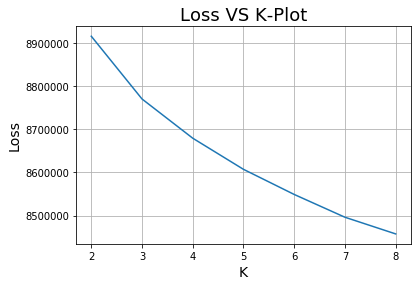

In [78]:
plt.plot(k_values, loss)
plt.xlabel('K',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-Plot',size=18)
plt.grid()
plt.show()

In [79]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(X_tr)

In [83]:
essays = preprocessed_essays_train
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  kmeans.labels_[i] == 3:
        cluster4.append(essays[i])
    elif  kmeans.labels_[i] == 4:
        cluster5.append(essays[i])
    elif  kmeans.labels_[i] == 5:
        cluster6.append(essays[i])

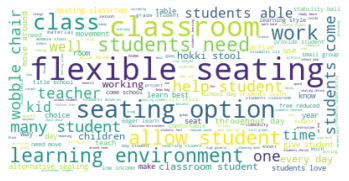

In [85]:
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

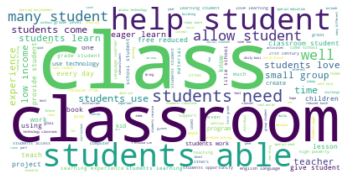

In [86]:
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

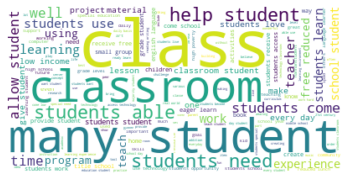

In [87]:
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

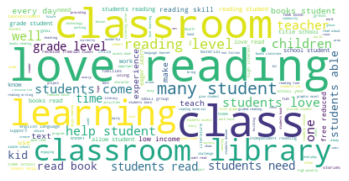

In [88]:
words=''
for i in cluster4:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

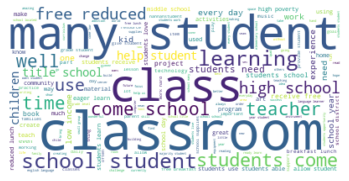

In [89]:
words=''
for i in cluster5:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

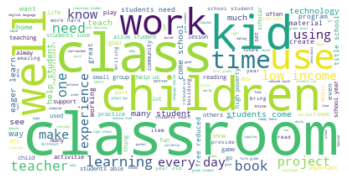

In [90]:
words=''
for i in cluster6:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Apply AgglomerativeClustering

## FOR K=2

In [92]:
from sklearn.cluster import AgglomerativeClustering
aggcl=AgglomerativeClustering(n_clusters=2).fit(X_tr[:5000].toarray())

In [93]:
cluster1=[]
cluster2=[]
essays = preprocessed_essays_train[:5000]
for i in range(aggcl.labels_.shape[0]):
    if aggcl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggcl.labels_[i] == 1:
        cluster2.append(essays[i])

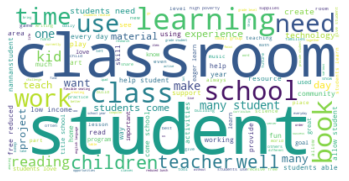

In [94]:
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

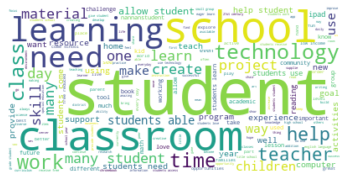

In [95]:
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## FOR K=5 :

In [96]:
aggcl=AgglomerativeClustering(n_clusters=5).fit(X_tr[:5000].toarray())

In [97]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
essays = preprocessed_essays_train[:5000]
for i in range(aggcl.labels_.shape[0]):
    if aggcl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggcl.labels_[i] == 1:
        cluster2.append(essays[i])
    elif aggcl.labels_[i] == 3:
        cluster3.append(essays[i])
    elif aggcl.labels_[i] == 4:
        cluster4.append(essays[i])

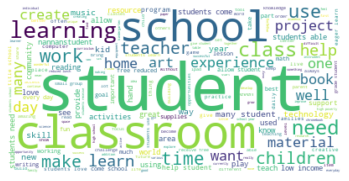

In [98]:
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

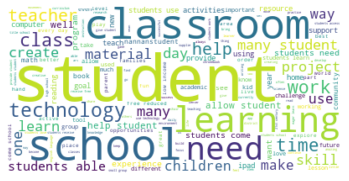

In [99]:
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

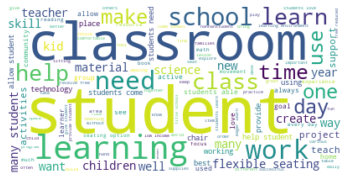

In [100]:
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

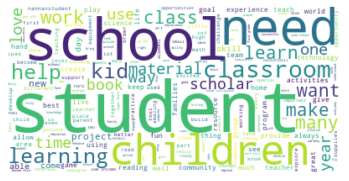

In [101]:
words=''
for i in cluster4:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Apply DBSCAN

100%|██████████| 5000/5000 [04:20<00:00, 19.17it/s]


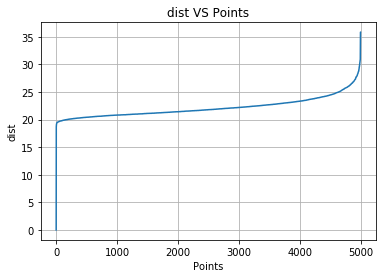

In [77]:
min_points = 1500
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
datt=X_tr[:5000].toarray()

distance=[]
for point in tqdm(datt):
    temp = euclidean_distances(datt, point.reshape(1, -1))
    distance.append(temp[min_points])
sorted_distance = np.sort(np.array(distance))

sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])
points = [i for i in range(len(datt))]


# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('dist')
plt.title('dist VS Points')
plt.grid()
plt.show()

In [78]:
#we can see that point of inflexion is at eps=9
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=20,n_jobs=-1)
dbscan.fit(datt)
print('No of clusters: ',len(set(dbscan.labels_)))
print('Cluster are including noise i.e -1: ',set(dbscan.labels_))

No of clusters:  2
Cluster are including noise i.e -1:  {0, -1}


In [80]:
essays = preprocessed_essays_train
cluster1=[]
cluster2=[]
for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(essays[i])
    elif dbscan.labels_[i] == -1:
        cluster2.append(essays[i])

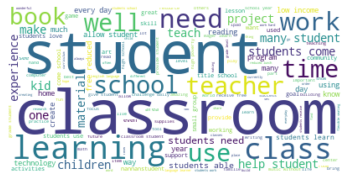

In [81]:
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

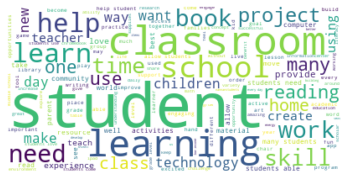

In [82]:
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusions :

In [83]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Vectorizer","Best k"]
x.add_row(['BOW','6'])
print(x)

+------------+--------+
| Vectorizer | Best k |
+------------+--------+
|    BOW     |   6    |
+------------+--------+


In [84]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Vectorizer","Best k"]
x.add_row(['BOW','2'])
x.add_row(['BOW','5'])
print(x)

+------------+--------+
| Vectorizer | Best k |
+------------+--------+
|    BOW     |   2    |
|    BOW     |   5    |
+------------+--------+


In [85]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Vectorizer","Best k","Eps","Number of clusters(INCLUDING NOISE)"]
x.add_row(['BOW','2',20,2])
print(x)

+------------+--------+-----+-------------------------------------+
| Vectorizer | Best k | Eps | Number of clusters(INCLUDING NOISE) |
+------------+--------+-----+-------------------------------------+
|    BOW     |   2    |  20 |                  2                  |
+------------+--------+-----+-------------------------------------+
